In [22]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv("zoo.csv")

In [4]:
# Display the first few rows
print("Dataset Head:")
data.head()


Dataset Head:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,b'aardvark',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'false',b'false',b'true',b'mammal'
1,b'antelope',b'true',b'false',b'false',b'true',b'false',b'false',b'false',b'true',b'true',b'true',b'false',b'false',4.0,b'true',b'false',b'true',b'mammal'
2,b'bass',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',b'true',0.0,b'true',b'false',b'false',b'fish'
3,b'bear',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'false',b'false',b'true',b'mammal'
4,b'boar',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'true',b'false',b'true',b'mammal'


In [5]:
# EDA: Overview
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    101 non-null    object 
 1   hair      101 non-null    object 
 2   feathers  101 non-null    object 
 3   eggs      101 non-null    object 
 4   milk      101 non-null    object 
 5   airborne  101 non-null    object 
 6   aquatic   101 non-null    object 
 7   predator  101 non-null    object 
 8   toothed   101 non-null    object 
 9   backbone  101 non-null    object 
 10  breathes  101 non-null    object 
 11  venomous  101 non-null    object 
 12  fins      101 non-null    object 
 13  legs      101 non-null    float64
 14  tail      101 non-null    object 
 15  domestic  101 non-null    object 
 16  catsize   101 non-null    object 
 17  type      101 non-null    object 
dtypes: float64(1), object(17)
memory usage: 14.3+ KB


In [6]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,legs
count,101.000000
mean,2.841584
std,2.033385
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,8.000000


In [7]:
print("\nChecking for Missing Values:")
data.isnull().sum()


Checking for Missing Values:


,0
animal,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


# **Data Cleaning**

In [10]:
# Remove 'b' prefix and decode binary columns
data = data.applymap(lambda x: x.strip("b'") if isinstance(x, str) and x.startswith("b'") else x)

<ipython-input-10-e04c0aa54ad7>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip("b'") if isinstance(x, str) and x.startswith("b'") else x)


# **EDA: Visualizations**

<ipython-input-11-df35d9952df6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


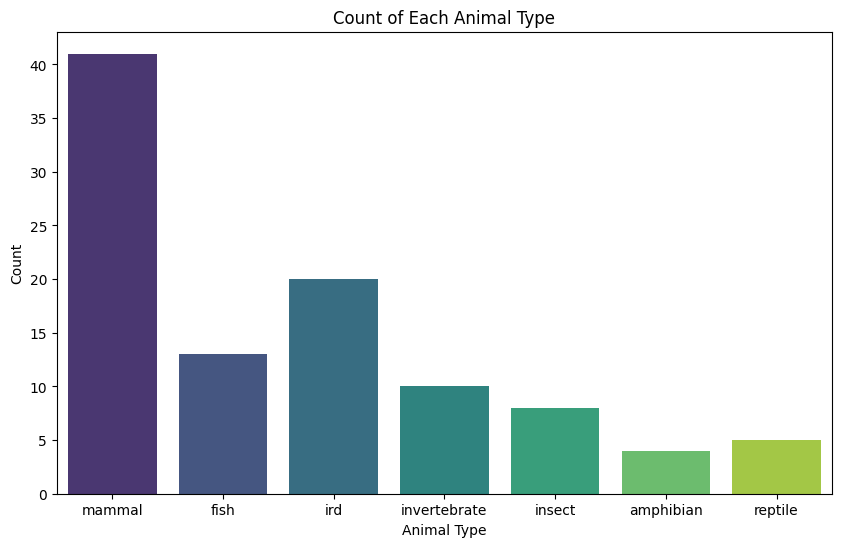

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Count of Each Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

## **Data Preprocessing**

In [14]:
# Identify columns that contain boolean-like string values ('true'/'false')
boolean_cols = [col for col in data.columns if data[col].astype(str).str.contains('true|false', na=False).any()]

# Convert these columns to actual Boolean types
for col in boolean_cols:
    data[col] = data[col].map({'true': True, 'false': False, 'True': True, 'False': False})


In [15]:
# Drop the identifier column 'animal'
data = data.drop('animal', axis=1)

In [16]:
# Encode the target variable 'type' using label encoding
data['type'] = pd.factorize(data['type'])[0]

In [17]:
# Splitting features and target
X = data.drop('type', axis=1)
y = data['type']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



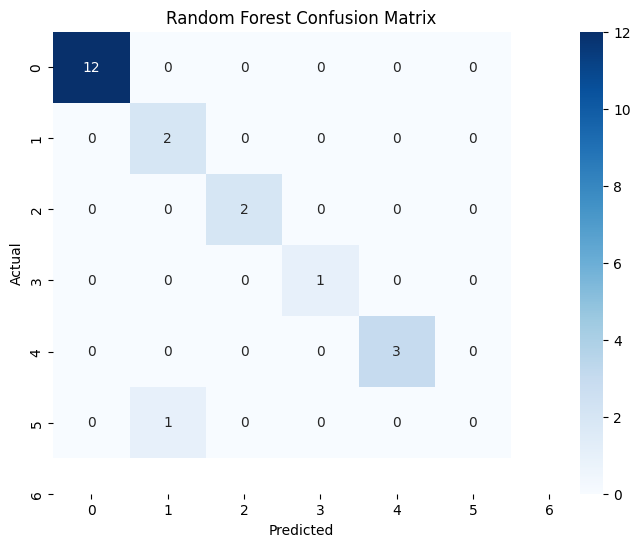


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



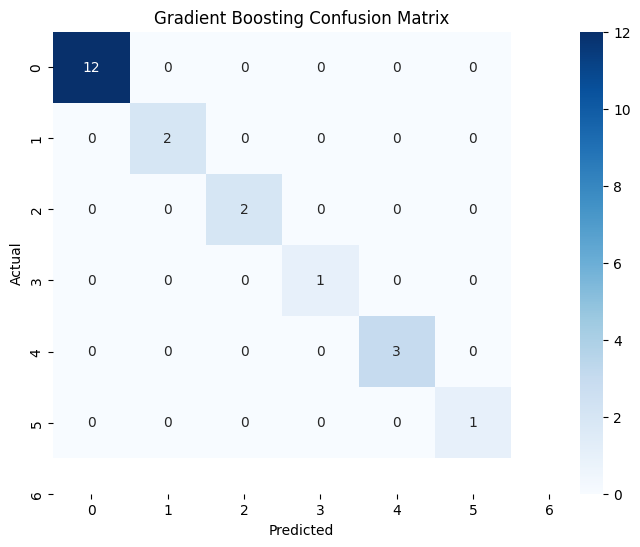


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



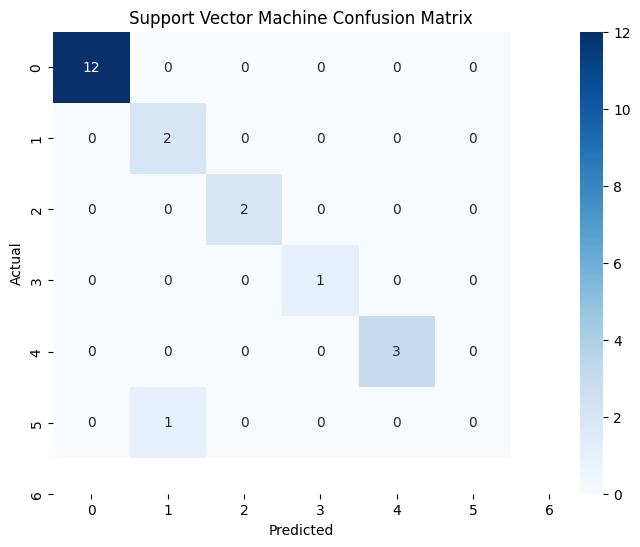


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



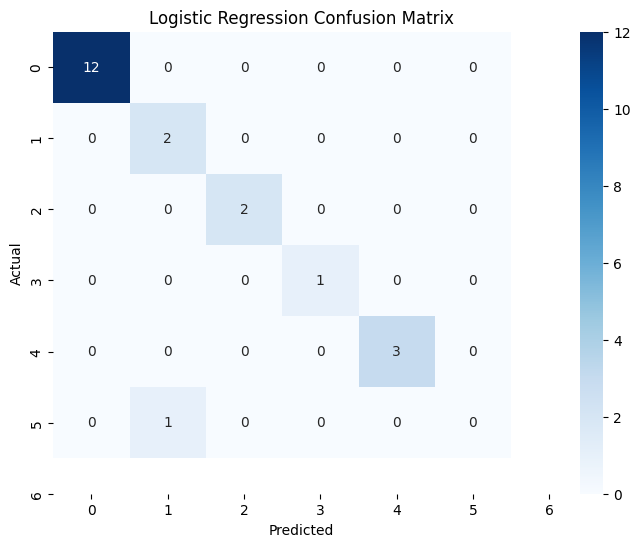

In [23]:
# Model Comparison
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(data['type']), yticklabels=np.unique(data['type']))
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Models Comparision**

In [24]:
# Summary of Model Performance
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,Model,Accuracy
0,Random Forest,0.952381
1,Gradient Boosting,1.000000
2,Support Vector Machine,0.952381
3,Logistic Regression,0.952381


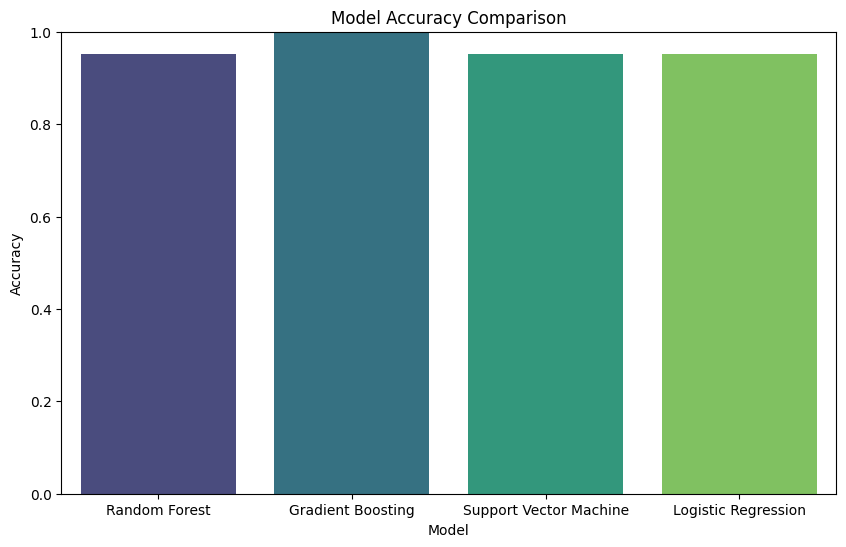

In [25]:
# Visualization: Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

In [26]:
# Feature Importance for Random Forest
rf_model = models['Random Forest']
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
feature_importances


Feature Importances (Random Forest):


,Feature,Importance
1,feathers,0.127652
3,milk,0.124255
2,eggs,0.102179
12,legs,0.100908
0,hair,0.096132
7,toothed,0.083446
8,backbone,0.072483
9,breathes,0.070566
11,fins,0.063198
5,aquatic,0.043890


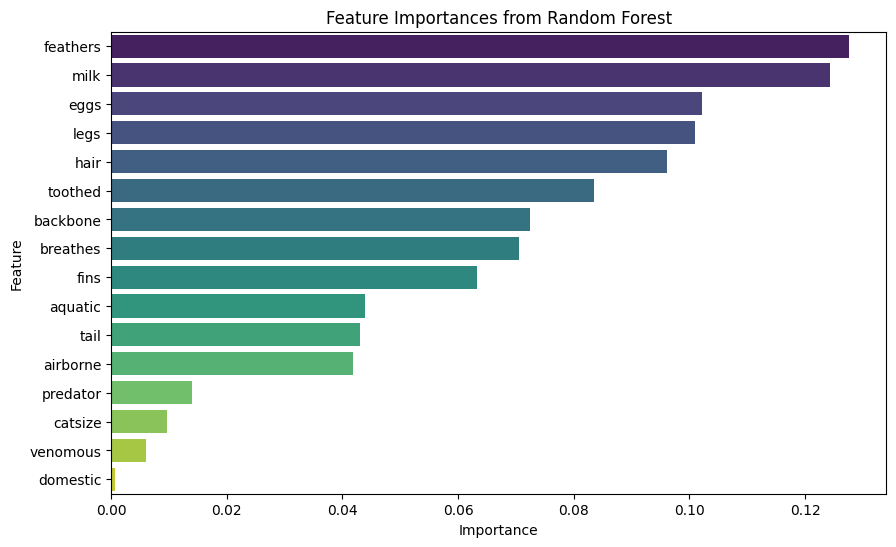

In [27]:
# Visualization: Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()
